#### Цель работы:
Изучение связи между признаками двумерного набора данных,
визуализация данных. 

#### Описание предметной области 
Вариант: 8. <br>
Набор данных: drivers2.csv.<br>
Атрибуты: 
1. Дата и время начала
2. Дата и время окончания
3. Категория
4. Место начала (можно не проверять данный столбец на наличие неявных
дубликатов)
5. Место окончания (можно не проверять данный столбец на наличие неявных
дубликатов)
6. Пройденные мили
7. Цель поездки
8. Время поездки в минутах
9. Скорость в пути
10. Цена поездки

#### 1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.

Загрузим датасет с помощью библиотеки pandas. url указывает местоположение датасета на компьютере. С помощью команды `read_csv()` прочитаем наш датасет.

In [22]:
import pandas as pd

url = r"C:\ГУАП\5 семестр\ВвАД\LR2\drivers2.csv"

df = pd.read_csv(url, encoding="UTF-8");

С помощью метода `info()` выведем:
1. Количество строк и столбцов,
2. Имена столбцов,
3. Количество непустых (non-null) значений,
4. Тип данных (int64, float64, object, datetime и т. д.),
5. Примерный объём памяти, занимаемый таблицей.

In [23]:
print("Информация о датасете")
df.info()

Информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


**Вывод:** Из данной таблицы видно, что всего 1099 строк (от 0 до 1998) и 10 столбцов. Количество непустых значений отображается в столбце Non_Null Count. Например, в столбце PURPOSE всего 598 заполненных значений, а остальные 1099 - 598 = 501 пустые.

С помощью метода `isnull()` и `sum()` посчитаем количество пустых значений в каждой колонке.

In [24]:
print(df.isnull().sum())

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       501
time             0
speed            0
price            0
dtype: int64


In [25]:
df['PURPOSE*'] = df['PURPOSE*'].fillna('Unknown')

In [26]:
print(df.isnull().sum())

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
time           0
speed          0
price          0
dtype: int64


Метод `describe`, который создаёт статистическое резюме по числовым колонкам

In [48]:
print("Статистическое описание")
print(df.describe())

Статистическое описание
             Miles         Time        Speed         Price
count  1099.000000  1099.000000  1099.000000   1099.000000
mean     10.803094    23.300273          inf   2085.929936
std      22.044580    27.745836          NaN   2084.368402
min       0.500000     0.000000     3.917355    337.000000
25%       2.900000    10.000000    15.346667   1087.000000
50%       6.000000    16.000000    21.333333   1539.000000
75%      10.500000    27.000000    28.915033   2365.500000
max     310.300000   336.000000          inf  25569.000000


C:\Users\marki\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Вывод включает: <br>
count -> Количество непустых значений <br>
mean -> Среднее значение <br>
std -> Стандартное отклонение (разброс данных) <br>
min	-> Минимальное значение <br>
25%	-> Первый квартиль (25% значений меньше или равно этому числу) <br>
50%	-> Медиана (второй квартиль) <br>
75%	-> Третий квартиль <br>
max	-> Максимальное значение

Убираем символ `*` из названий колонок с помощью метода `columns.str.replace()`.
Что деалет метод: <br>
1. `df.columns` — это список названий всех столбцов в DataFrame. <br>
2. `.str.replace('*', '', regex=False)` — метод, который ищет символ `*` в каждой строке и заменяет его на пустую строку, то есть удаляет. <br>
3. `regex=False` указывает, что * воспринимается как обычный символ, а не как специальный символ регулярного выражения.

In [28]:
df.columns = df.columns.str.replace('*', '', regex=False)  
df.columns = df.columns.str.capitalize()                  

Далее выводим название колонок с помощью атрибута `columns`.

In [29]:
print(df.columns)

Index(['Start_date', 'End_date', 'Category', 'Start', 'Stop', 'Miles',
       'Purpose', 'Time', 'Speed', 'Price'],
      dtype='object')


#### 2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).


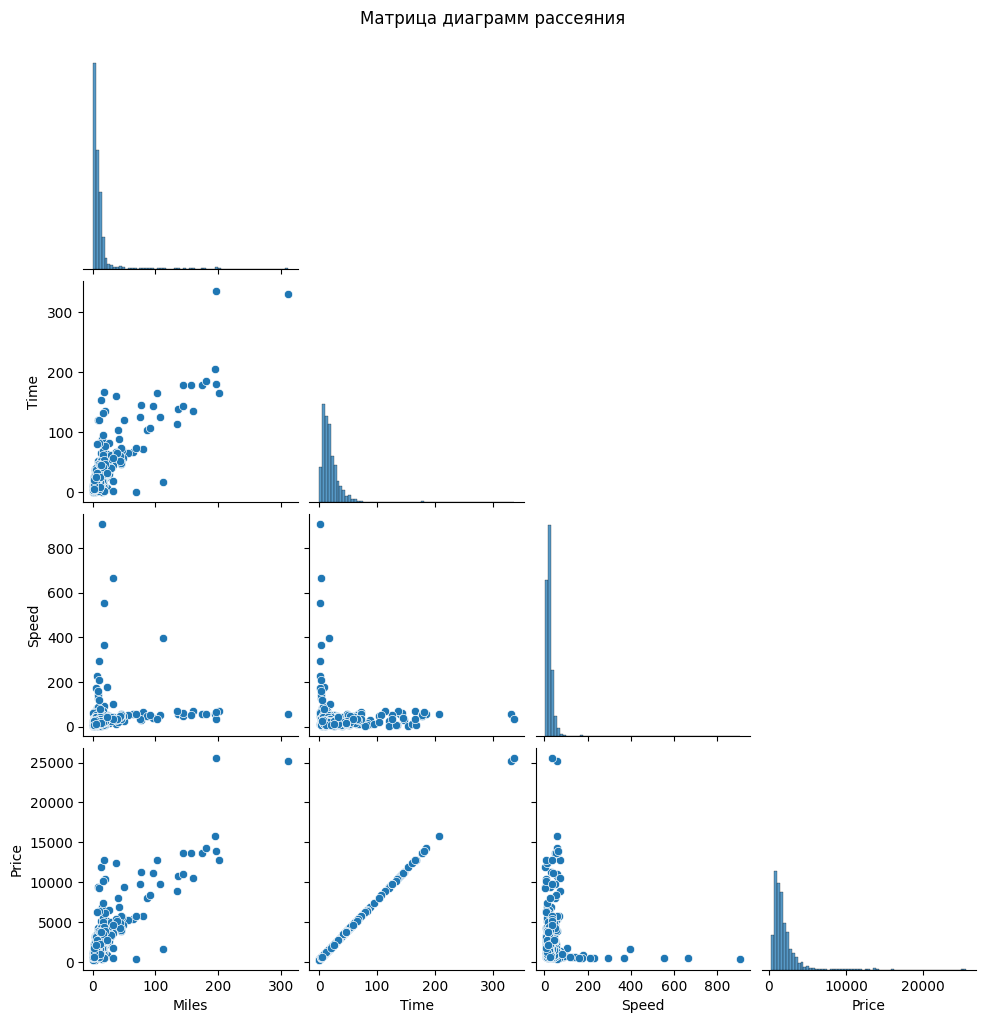

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

sns.pairplot(numeric_df, diag_kind="hist", corner=True)
plt.suptitle("Матрица диаграмм рассеяния", y=1.02)
plt.show()

<Axes: xlabel='Miles', ylabel='Price'>

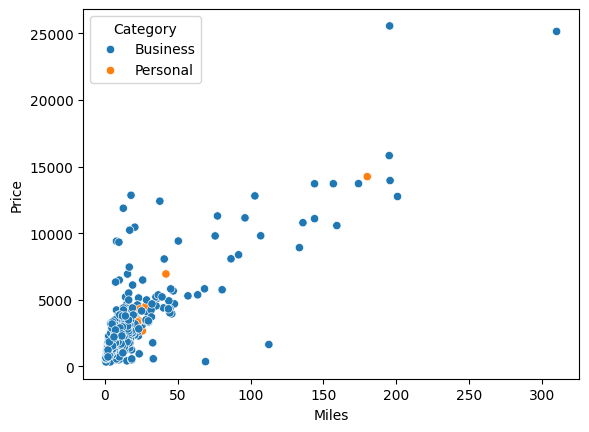

In [31]:
sns.scatterplot(data=df, x='Miles', y='Price', hue='Category')

На представленных диаграммах рассеяния можно проследить определённые взаимосвязи между параметрами:
1. **Минуты (Mins) – Цена (Price)**
   Наблюдается тенденция: чем больше количество минут, тем выше цена. Несмотря на то, что данные имеют значительный разброс, общая зависимость прямая — увеличение времени использования влечёт за собой рост стоимости.
2. **Минуты (Mins) – Скорость (Speed)**
   Явной зависимости не прослеживается. Большая часть значений сосредоточена в нижней части графика (при малых значениях скорости), но единичные точки выбросов показывают крайне высокие значения скорости, не влияя на общую тенденцию.
3. **Скорость (Speed) – Цена (Price)**
    Взаимосвязь между скоростью и ценой также выражена слабо. Основная масса наблюдений сосредоточена при малых значениях скорости, где цена варьируется достаточно широко. Это указывает на то, что цена зависит скорее от других параметров (например, минут), чем от скорости.
4. **Цена (Price) – Минуты (Mins) по категориям**
   На графике, разделённом по категориям (Business и Personal), видно, что обе категории имеют схожую зависимость: с ростом минут увеличивается цена. Однако для категории Business наблюдаются более высокие значения цены при сопоставимых минутах, что говорит о различиях тарифных планов или политике ценообразования в зависимости от категории.

#### 3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.

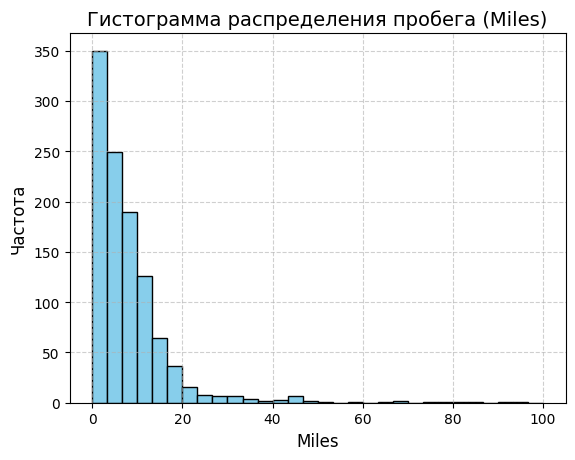

In [36]:
df["Miles"].hist(bins=30, range=(0, 100), color="skyblue", edgecolor="black")

plt.xlabel("Miles", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Гистограмма распределения пробега (Miles)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

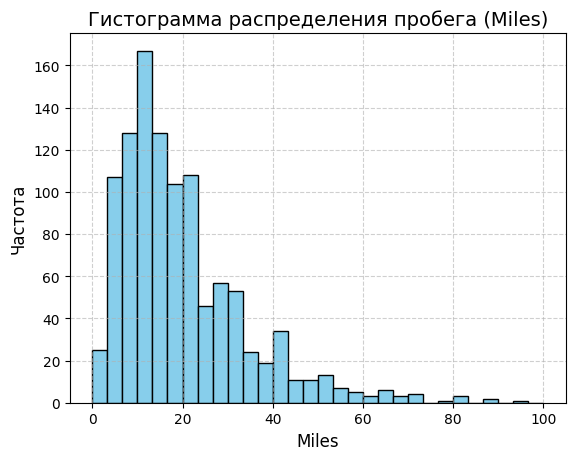

In [37]:
df["Time"].hist(bins=30, range=(0, 100), color="skyblue", edgecolor="black")

plt.xlabel("Miles", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Гистограмма распределения пробега (Miles)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

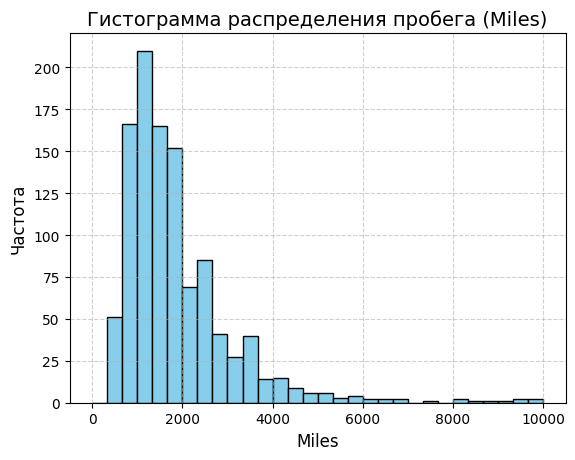

In [38]:
df["Price"].hist(bins=30, range=(0, 10000), color="skyblue", edgecolor="black")

plt.xlabel("Miles", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Гистограмма распределения пробега (Miles)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

Основные данные сосредоточены в нижних диапазонах, а редкие высокие значения формируют длинные хвосты.

#### 4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.

In [12]:
df = df.select_dtypes(include=np.number)
df.corr() 

,MILES*,time,speed,price
MILES*,1.000000,0.844875,0.192600,0.845818
time,0.844875,1.000000,0.005034,0.999998
speed,0.192600,0.005034,1.000000,0.005651
price,0.845818,0.999998,0.005651,1.000000


In [15]:
df = df.select_dtypes(include=np.number)

# Удаляем полностью пустые столбцы
df = df.dropna(axis=1, how='all')

# Заменяем бесконечности на NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Удаляем строки, где есть NaN (или можно заменить нулями)
df = df.dropna(axis=0, how='any')

# Убираем столбцы с нулевой дисперсией (иначе ковариация не имеет смысла)
df = df.loc[:, df.std() != 0]
df.cov() 

,MILES*,time,speed,price
MILES*,484.414811,519.332857,187.193450,3.905647e+04
time,519.332857,770.653900,6.170935,5.789488e+04
speed,187.193450,6.170935,1950.082519,5.204055e+02
price,39056.466480,57894.879112,520.405543,4.349329e+06


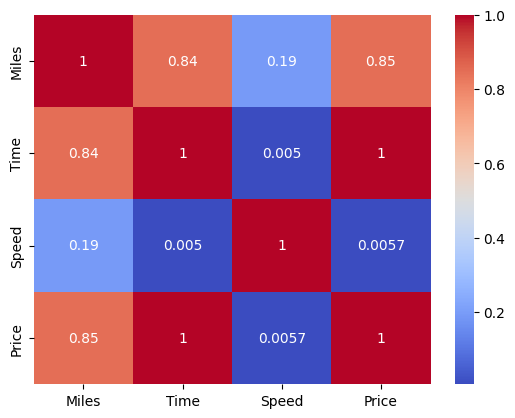

In [17]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

По графику видно, что кореляция равна 1, когда сравниваются одни и те же поля, например: Time и Time (то есть время со временем). Также видно, что коэффициент кореляции приближается к единице, при сравнении Miles и Time, Price.

#### 5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.


#### 5.1 Задание 1 : Использовать seaborn. По группировке - CATEGORY и среднее кол-во пройденных миль по каждой цели маршрута - PURPOSE построить диаграмму

Для анализа данных была выполнена группировка по признакам Category и Purpose с расчётом среднего значения пройденных миль (Miles). Построенная столбчатая диаграмма позволяет наглядно сравнить среднее количество миль для различных целей поездок и категорий.

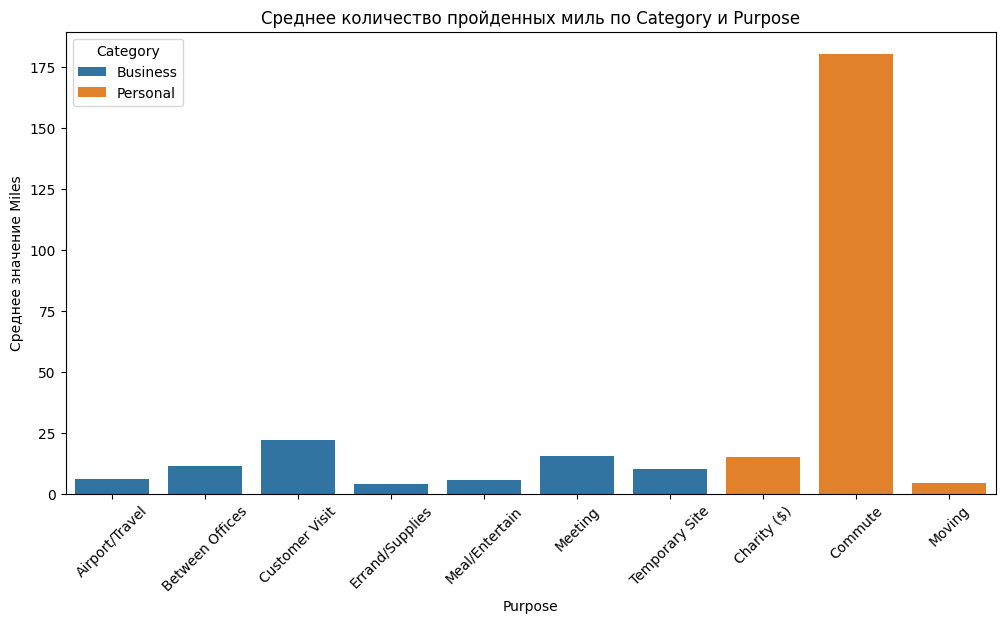

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Группировка и расчет среднего
grouped = df.groupby(['Category', 'Purpose'])['Miles'].mean().reset_index()

# Столбчатая диаграмма
plt.figure(figsize=(12,6))
sns.barplot(
    x='Purpose',
    y='Miles',
    hue='Category',
    data=grouped
)

plt.title('Среднее количество пройденных миль по Category и Purpose')
plt.xticks(rotation=45)
plt.ylabel('Среднее значение Miles')
plt.xlabel('Purpose')
plt.legend(title='Category')
plt.show()


#### 5.2 Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить минимальную стоимость по каждой начальной точке поездки (START). Отфильтровать сводную таблицу и оставить стоимость только выше 5000. Оставить только маркеры в виде ● черного цвета размером 16.

Код строит точечную диаграмму минимальных цен по каждой начальной точке (Start), но только для случаев, когда цена превышает 5000. Такой график позволяет быстро выявить точки, где минимальная стоимость оказалась высокой, и сравнить их между собой.

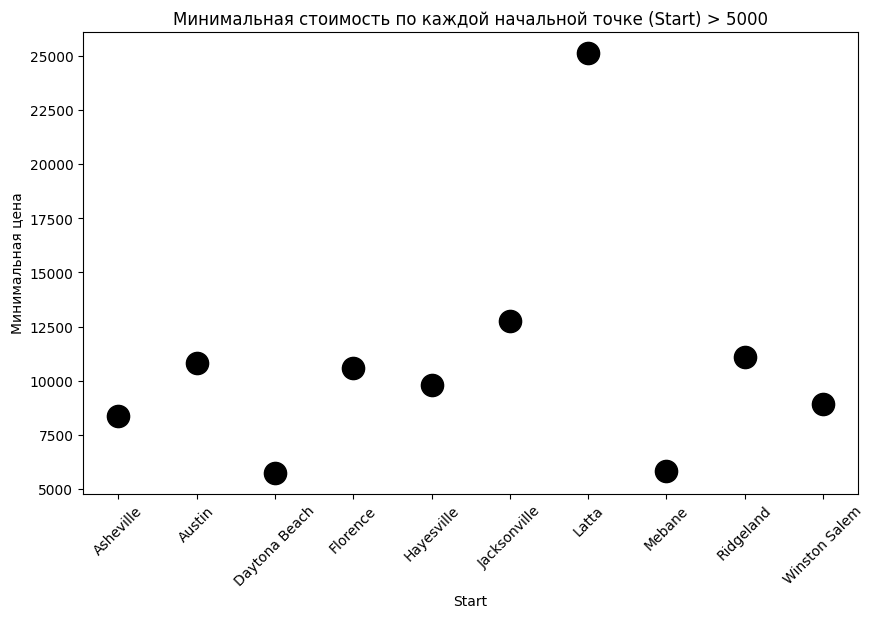

In [46]:
pivot = df.pivot_table(
    index='Start',
    values='Price',
    aggfunc='min'
)

pivot_filtered = pivot[pivot['Price'] > 5000]

ax = pivot_filtered.plot(
    y='Price',
    kind='line',
    marker='o',
    color='black',
    markersize=16,
    linestyle='None',   # убираем линии, остаются только точки
    legend=False,
    figsize=(10,6)
)

ax.set_title('Минимальная стоимость по каждой начальной точке (Start) > 5000')
ax.set_ylabel('Минимальная цена')
ax.set_xlabel('Start')

#Обеспечиваем подпись каждой точки
ax.set_xticks(range(len(pivot_filtered.index)))
ax.set_xticklabels(pivot_filtered.index, rotation=45)

plt.show()


#### 5.3 Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой категории поездки. 

Круговая диаграмма позволяет наглядно оценить, какая категория поездок преобладает, и сравнить их доли между собой. Это даёт общее представление о структуре данных и позволяет сделать вывод о том, какие виды поездок встречаются чаще всего.

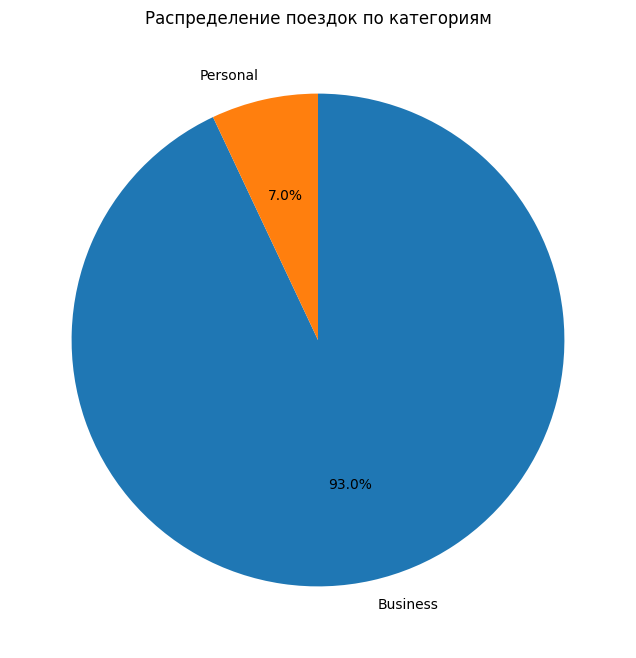

In [21]:
import matplotlib.pyplot as plt

# Подсчёт количества поездок по каждой категории
category_counts = df['Category'].value_counts()

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%',   # отображение процентов
    startangle=90,       # поворот, чтобы начиналось сверху
    counterclock=False   # направление по часовой стрелке
)

plt.title('Распределение поездок по категориям')
plt.show()


#### 6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.

<Axes: xlabel='Miles', ylabel='Price'>

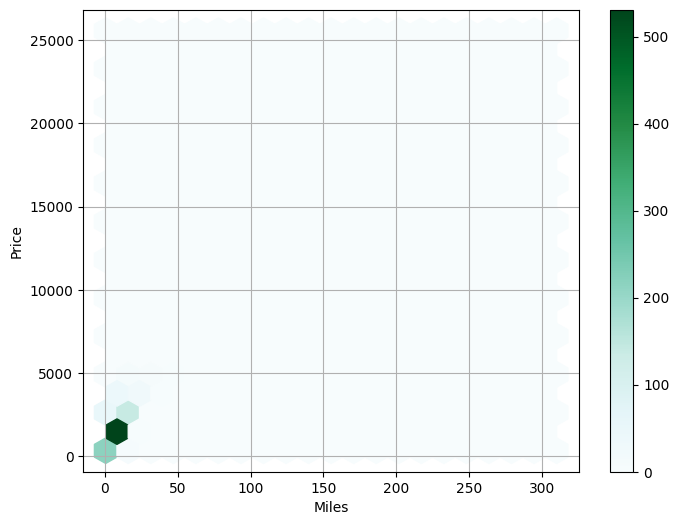

In [16]:
df.plot(x='Miles', y='Price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False,
grid=True)

**Вывод:** Закрашенных шестиугольников получилось мало, что означает низкую плотность данных. Это говорит о том, что значений в выборке относительно немного, и они распределены неравномерно: большая часть данных сосредоточена в небольших диапазонах, а для остальных областей точек практически нет.
Получается между Miles и Price не наблюдается выраженной зависимости.

#### 7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

<Axes: >

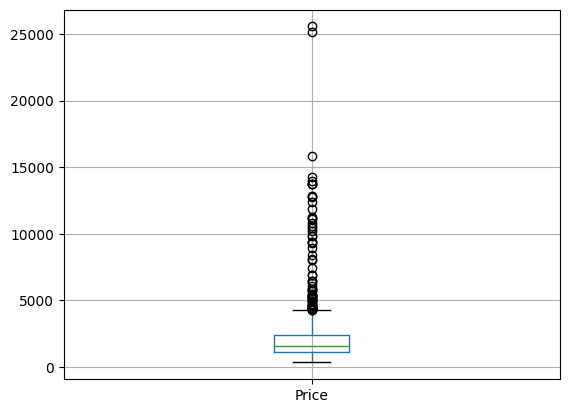

In [18]:
df.boxplot(column = 'Price')

#### 8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).

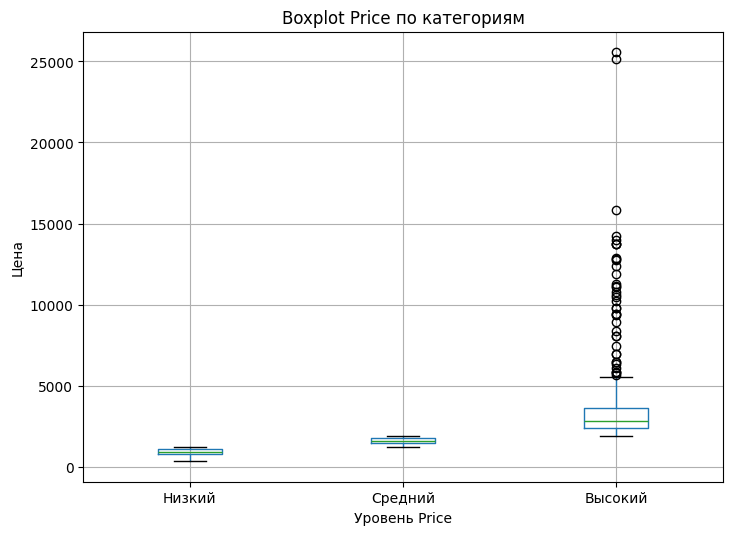

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем категории по столбцу Price
df['Price_level'] = pd.cut(
    df['Price'],
    bins=[-float('inf'), df['Price'].quantile(0.33), df['Price'].quantile(0.66), float('inf')],
    labels=['Низкий', 'Средний', 'Высокий']
)

# Boxplot для Price по категориям
df.boxplot(column='Price', by='Price_level', figsize=(8,6))
plt.title('Boxplot Price по категориям')
plt.suptitle('')  # убираем стандартный заголовок от pandas
plt.xlabel('Уровень Price')
plt.ylabel('Цена')
plt.show()


**Вывод**
- Большинство товаров (или объектов в данных) имеют высокие цены, а низкие и средние уровни практически отсутствуют.

- Диапазон цен в «Низком» и «Среднем» категориях либо очень мал, либо там просто нет наблюдений.

#### 9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

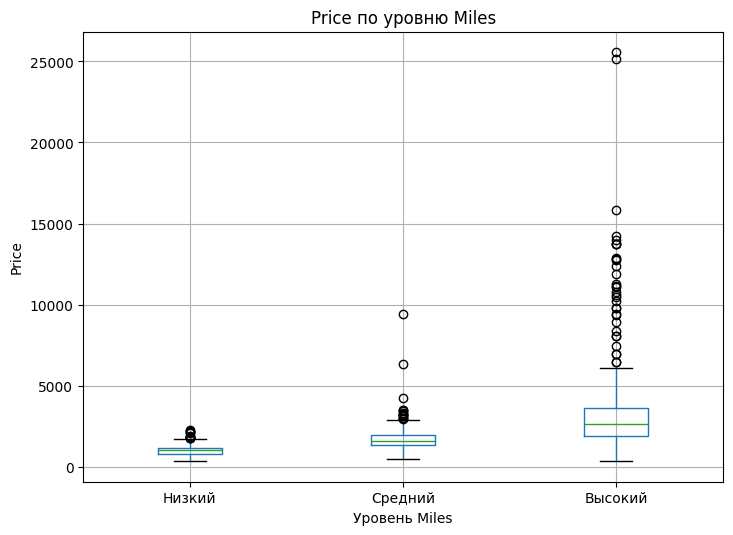

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем категорию для Miles
df['Miles_level'] = pd.cut(
    df['Miles'],
    bins=[-float('inf'), df['Miles'].quantile(0.33), df['Miles'].quantile(0.66), float('inf')],
    labels=['Низкий', 'Средний', 'Высокий']
)

# Boxplot для Price по уровню Miles
df.boxplot(column='Price', by='Miles_level', figsize=(8,6))
plt.title('Price по уровню Miles')
plt.suptitle('')
plt.xlabel('Уровень Miles')
plt.ylabel('Price')
plt.show()


**Вывод**
- Основная масса цен сосредоточена в высоком уровне пробега. То есть машины с большим пробегом в данных чаще встречаются с высокими ценами, а низкий и средний уровни пробега представлены гораздо реже.

- Диапазон цен для «Низкого» и «Среднего» пробега либо очень узкий, либо почти пустой, что говорит о неравномерном распределении данных по пробегу.

- На графике видно, что цена практически не зависит от низкого или среднего пробега в этой выборке, а влияние заметно только для высоких значений.

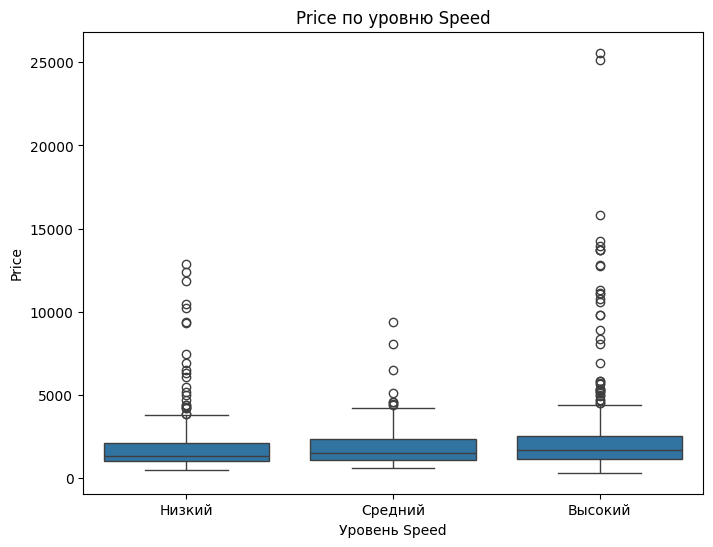

In [21]:
import seaborn as sns

# Создаем категорию для Speed
df['Speed_level'] = pd.cut(
    df['Speed'],
    bins=[-float('inf'), df['Speed'].quantile(0.33), df['Speed'].quantile(0.66), float('inf')],
    labels=['Низкий', 'Средний', 'Высокий']
)

# Boxplot с seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='Speed_level', y='Price', data=df)
plt.title('Price по уровню Speed')
plt.xlabel('Уровень Speed')
plt.ylabel('Price')
plt.show()


**Вывод** 
- Для низкого и среднего уровня Speed есть отдельные наблюдения (кружочки на графике), но большинство цен всё равно сосредоточено на высоком уровне Speed.

- Box для «Высокого» уровня шире и выше по медиане, что показывает, что более быстрые машины обычно дороже.

- Точки в низком и среднем уровнях показывают редкие случаи, когда машины с низкой или средней скоростью имеют высокую цену — это выбросы или исключения из общей тенденции.